# Baby Growth

Hello my name is Ryan.

## *Data Info*
This data is from my daughter's first 5 months of life (March to early August). She was born 8lbs 3oz / 22in, which is heavy and long for her gender. She was born a big baby and continues to grow really well 👶🏻.

This dataset includes:
* Weight (lb,oz)
* Length (in)
* Feeding Amount (oz)
* Dirty Diaper (stool)

## *Questions To Answer:*
1. What was my baby's growth like (weight and length)?
2. Did the feeding amount affect her growth?
3. When did feedings become scheduled/consistent?
4. Did feeding amount affect dirty diaper frequency?

##### Initial Setup

In [1]:
# Import Data & modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import figure

df = pd.read_csv('./HatchBaby_updated')
df.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Unnamed: 9
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse,NaN
1,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Length,21.5,0.9983,NaN,NaN,Measured by Nurse,NaN
2,Hidden Name,03/06/2022 0:00 AM,03/06/2022 0:00 AM,Weight,7.875,NaN,NaN,NaN,Measured by Nurse,NaN


In [2]:
# Number of Rows
len(df)

1894

In [3]:
# Data Types
df.dtypes

Baby Name      object
Start Time     object
End Time       object
Activity       object
Amount         object
Percentile    float64
Duration      float64
Info           object
Notes          object
Unnamed: 9    float64
dtype: object

In [4]:
# Check For Nulls
df.isnull().sum()

Baby Name        1
Start Time       0
End Time         0
Activity         0
Amount           8
Percentile    1864
Duration       712
Info           721
Notes         1796
Unnamed: 9    1894
dtype: int64

In [5]:
# Drop Unused Column
df2 = df.drop(columns = 'Unnamed: 9')
df2.head(1)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse


In [6]:
# 'Activity' types
print(df2['Activity'].unique())

['Weight' 'Length' 'Feeding' 'Diaper' 'Sleep' 'Pump']


In [7]:
# 'Amount' has non-numeric values; find these values
df2[df2['Amount'].isnull()]

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes
504,Hidden Name,04/12/2022 17:05 PM,04/12/2022 18:00 PM,Sleep,NaN,NaN,0.916667,NaN,NaN
508,Hidden Name,04/12/2022 19:05 PM,04/12/2022 20:18 PM,Sleep,NaN,NaN,1.216667,NaN,NaN
863,Hidden Name,05/08/2022 15:25 PM,05/08/2022 16:10 PM,Sleep,NaN,NaN,0.750000,NaN,NaN
891,Hidden Name,05/10/2022 10:51 AM,05/10/2022 12:21 PM,Sleep,NaN,NaN,1.500000,NaN,NaN
906,Hidden Name,05/10/2022 23:55 PM,05/11/2022 1:40 AM,Sleep,NaN,NaN,1.750000,NaN,NaN
907,Hidden Name,05/11/2022 2:15 AM,05/11/2022 2:56 AM,Sleep,NaN,NaN,0.683333,NaN,NaN
923,Hidden Name,05/12/2022 3:50 AM,05/12/2022 5:25 AM,Sleep,NaN,NaN,1.583333,NaN,NaN
924,Hidden Name,05/12/2022 6:10 AM,05/12/2022 8:40 AM,Sleep,NaN,NaN,2.500000,NaN,NaN


In [8]:
# 'Amount' has non-numeric values; find these values
df_amount_nn = df2[df2['Amount'].str.match('\d+') == False]
print(df_amount_nn['Amount'].unique())

['Wet + Dirty' 'Wet' 'Dirty']


In [9]:
# Add 'Date' Column
df2['Date'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.floor('d')
#df2['Date'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.date

In [10]:
# Add 'Month' Column
df2['Month'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.month

In [11]:
# Add 'DOW' Column
df2['DOW #'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.dayofweek
df2['DOW'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.day_name()

In [12]:
# Add 'Time' Column
df2['Time'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.time

In [13]:
# Add 'Hour' Column
df2['Hour(int)'] = pd.to_datetime(df2['Start Time'], format = '%m/%d/%Y %H:%M %p').dt.hour
df2['Hour(dt)'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(df2['Hour(int)'], unit='H')
df2['Hour(dt)'] = pd.to_datetime(df2['Hour(dt)'])

In [14]:
# Sort
df2 = df2.sort_values('Start Time', ascending=True)
df2.tail(5)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1890,Hidden Name,08/06/2022 15:30 PM,08/06/2022 15:30 PM,Feeding,5,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,15:30:00,15,2022-01-01 15:00:00
1892,Hidden Name,08/06/2022 18:44 PM,08/06/2022 18:44 PM,Feeding,6,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,18:44:00,18,2022-01-01 18:00:00
1888,Hidden Name,08/06/2022 5:55 AM,08/06/2022 5:55 AM,Feeding,4,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,05:55:00,5,2022-01-01 05:00:00
1887,Hidden Name,08/06/2022 6:44 AM,08/06/2022 6:44 AM,Feeding,2,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,06:44:00,6,2022-01-01 06:00:00
1889,Hidden Name,08/06/2022 9:28 AM,08/06/2022 9:28 AM,Feeding,5.8,NaN,0.0,Bottle,NaN,2022-08-06,8,5,Saturday,09:28:00,9,2022-01-01 09:00:00


In [15]:
# Set Style
plt.style.use('Solarize_Light2')

##### Weight Setup

In [16]:
# Filter Weight; Drop Null Values from 'Amount'
df_weight = df2[df2['Activity'] == 'Weight']
df_weight = df_weight[df_weight['Amount'].notna()]
df_weight.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
0,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Weight,8.18,0.8411,NaN,NaN,Measured by Nurse,2022-03-05,3,5,Saturday,00:00:00,0,2022-01-01
2,Hidden Name,03/06/2022 0:00 AM,03/06/2022 0:00 AM,Weight,7.875,NaN,NaN,NaN,Measured by Nurse,2022-03-06,3,6,Sunday,00:00:00,0,2022-01-01
4,Hidden Name,03/09/2022 0:00 AM,03/09/2022 0:00 AM,Weight,7.53,0.5487,NaN,NaN,Measured by Nurse,2022-03-09,3,2,Wednesday,00:00:00,0,2022-01-01


In [17]:
# Convert 'Amount' to Float
df_weight['Amount'] = df_weight['Amount'].astype(float)

## Weight

Text(0, 0.5, 'Pounds')

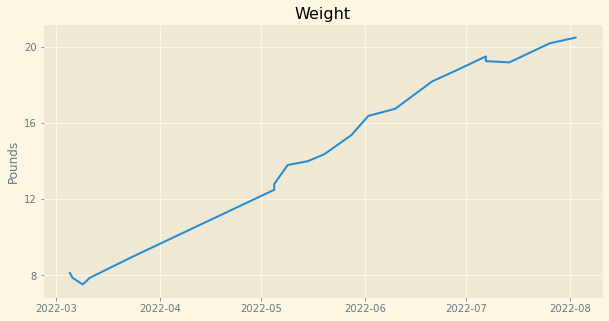

In [18]:
# Plot Weight
figure(figsize=(10,5))
plt.yticks(np.arange(0, (max(df_weight['Amount'])+1), 4))
plt.plot(df_weight['Date'], df_weight['Amount'])
plt.title('Weight')
plt.ylabel('Pounds')

Text(0.5, 1.0, 'Weight Percentile')

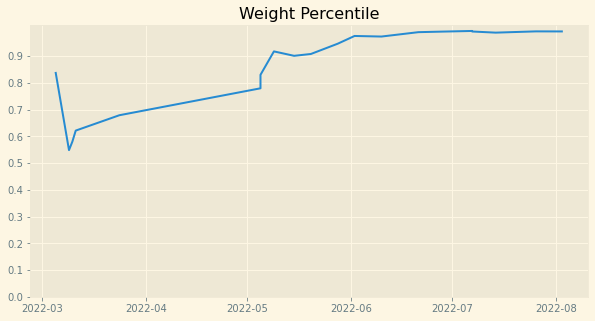

In [19]:
# Plot Weight Percentile
figure(figsize=(10,5))
df_weight_p = df_weight[df_weight['Percentile'].notna()]
plt.plot(df_weight_p['Date'], df_weight_p['Percentile'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.yticks(np.arange(0, 1, .1))
plt.title('Weight Percentile')

The rate of weight gain seems to be more or less consistent. However, there was a short burst sometime in early May before returning to its normal trajectory. We can later check if there was also an increase in feeding during this time, which may have caused the quick weight gain.

My daughter also had jaundice shortly after birth, which is reflected in the weight drop in March. We supplemented her feeding with formula and she has been doing great since! We may have been slightly overfeeding her due to the jaundice scare, causing her to jump to a very high weight percentile. This will be further explored later.

##### Length Setup

In [20]:
# Filter Length; Drop Null Values from 'Amount'
df_len = df2[df2['Activity'] == 'Length']
df_len = df_len[df_len['Amount'].notna()]
df_len.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1,Hidden Name,03/05/2022 0:00 AM,03/05/2022 0:00 AM,Length,21.5,0.9983,NaN,NaN,Measured by Nurse,2022-03-05,3,5,Saturday,00:00:00,0,2022-01-01
3,Hidden Name,03/09/2022 0:00 AM,03/09/2022 0:00 AM,Length,21.3,0.9884,NaN,NaN,Measured by Nurse,2022-03-09,3,2,Wednesday,00:00:00,0,2022-01-01
7,Hidden Name,03/24/2022 0:00 AM,03/24/2022 0:00 AM,Length,22.2,0.9884,NaN,NaN,Measured by Nurse,2022-03-24,3,3,Thursday,00:00:00,0,2022-01-01


In [21]:
# Convert 'Amount' to Float
df_len['Amount'] = df_len['Amount'].astype(float)

## Length

Text(0, 0.5, 'Inches')

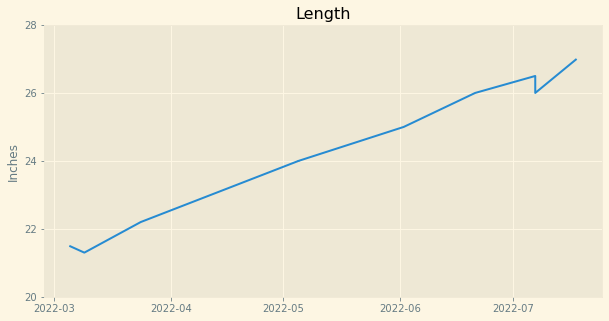

In [22]:
# Plot-Length
figure(figsize=(10,5))
plt.plot(df_len['Date'], df_len['Amount'])
plt.yticks(np.arange(20, (max(df_len['Amount'])+1), 2))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Length')
plt.ylabel('Inches')

Text(0.5, 1.0, 'Length Percentile')

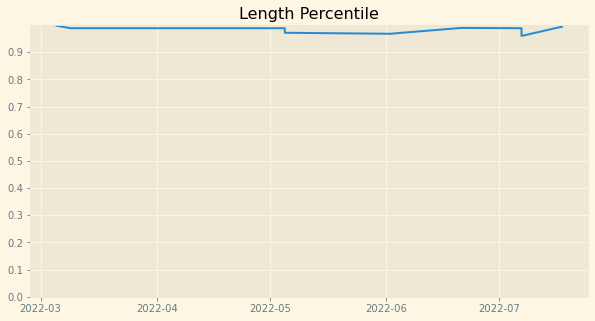

In [23]:
# Plot-Length Percentile
figure(figsize=(10,5))
df_len_p = df_len[df_len['Percentile'].notna()]
plt.plot(df_len_p['Date'], df_len_p['Percentile'])
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.yticks(np.arange(0, 1, .1))
plt.title('Length Percentile')

Her rate of length increase seems to be consistent overall, except for the slight March dip, which coincided with the weight drop during jaundice, and another small dip in July. However, this may be negligible as these dips are only off by fractions of an inch. I don't think she actually got shorter. It may be due to the difficulty of getting precise measurements when the baby is squirming and different people (several nurses, me) doing the measuring.

***Overall, she seems to always be in the high 90th percentile in length since birth. Weight was lagging due to the jaundice, but it caught up eventually within a few months.*** With both weight and length percentiles about the same, this seems to be a good sign that her growth is going really well!

##### Feeding Setup

In [24]:
# Filter Feeding; Drop Null Values
df_feed = df2[df2['Activity'] == 'Feeding']
df_feed = df_feed[df_feed['Amount'].notna()]
df_feed.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
18,Hidden Name,03/13/2022 0:56 AM,03/13/2022 0:56 AM,Feeding,2,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,00:56:00,0,2022-01-01 00:00:00
13,Hidden Name,03/13/2022 11:45 AM,03/13/2022 11:45 AM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,11:45:00,11,2022-01-01 11:00:00
24,Hidden Name,03/13/2022 14:45 PM,03/13/2022 14:45 PM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,14:45:00,14,2022-01-01 14:00:00


In [25]:
# Convert 'Amount' to Float
df_feed['Amount'] = df_feed['Amount'].astype(float)

In [26]:
# Group & Sum by Day
df_feed_sum_day = df_feed['Amount'].groupby(df_feed['Date']).sum().reset_index(name ='Day Feed Amount')

## Feeding

#### *-Sum by Day*

Text(0, 0.5, 'Ounces')

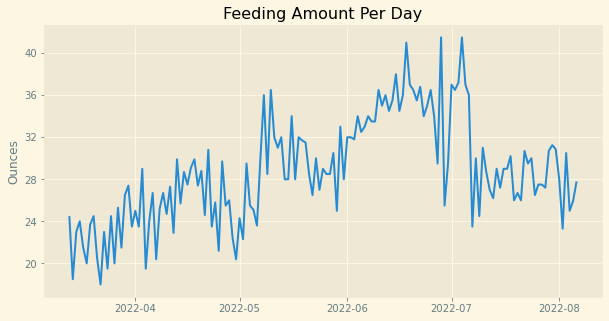

In [27]:
# Plot-Feeding Amount By Day
figure(figsize=(10,5))
plt.yticks(np.arange(0, (max(df_feed_sum_day['Day Feed Amount'])+1), 4))
plt.plot(df_feed_sum_day['Date'], df_feed_sum_day['Day Feed Amount'])
plt.title('Feeding Amount Per Day')
plt.ylabel('Ounces')

There was a jump of about 10oz in May, which coincides with the slight increase in the rate of weight gain previously mentioned. The feeding amount increased once again in June, until a drop in July to previous levels. This drop was when the doctor told us we needed to slow down on the feeding. ***This increase in feeding from May to early July is also reflected in the increase in weight during the same time. We can safely conclude that feeding amount strongly affected her weight at the very least, which in turn most likely affected her overall growth.***

##### *-Sum by Hour Setup*

In [28]:
# Group & Sum by Hour-Bar
df_feed_sum_hr_bar = df_feed.groupby(['Hour(dt)']).agg({'Amount': ['sum']}).reset_index()
df_feed_sum_hr_bar.sort_values(by=('Amount','sum'),ascending=False).head(10)

,Hour(dt),Amount
,,sum
18,2022-01-01 18:00:00,291.40
12,2022-01-01 12:00:00,267.70
16,2022-01-01 16:00:00,247.60
6,2022-01-01 06:00:00,242.30
15,2022-01-01 15:00:00,241.75
14,2022-01-01 14:00:00,239.20
19,2022-01-01 19:00:00,237.10
9,2022-01-01 09:00:00,229.80
17,2022-01-01 17:00:00,224.20


#### *-Sum by Hour*

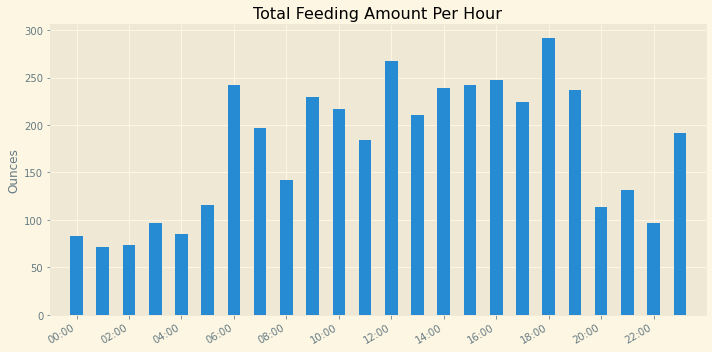

In [29]:
# Bar-Feeding Amount By Hr
fig, ax_fs_h = plt.subplots(figsize=(10,5))

x_fs_h = df_feed_sum_hr_bar['Hour(dt)']
y_fs_h = df_feed_sum_hr_bar['Amount']['sum']
ax_fs_h.bar(x_fs_h, y_fs_h, width=0.02)

hours = mdates.HourLocator(interval = 2)
hh_mm = mdates.DateFormatter('%H:%M')
ax_fs_h.xaxis.set_major_locator(hours)
ax_fs_h.xaxis.set_major_formatter(hh_mm)

ax_fs_h.set_title('Total Feeding Amount Per Hour')
ax_fs_h.set_ylabel('Ounces')

ax_fs_h.set_xlim(datetime.datetime(2021, 12, 31, 23, 0), datetime.datetime(2022, 1, 1, 23, 59))
#plt.setp(ax_fs_h.get_xticklabels()[-1], visible=False)

fig.autofmt_xdate()
fig.tight_layout()

Top ten hours for total amount were:
1. 6 PM
2. 12 PM
3. 4 PM
4. 6 ***AM***
5. 3 PM
6. 2 PM
7. 7 PM
8. 9 ***AM***
9. 5 PM
10. 10 ***AM***

##### *-Different View*

In [30]:
# Group & Sum by Hour-Plot
df_feed_sum_hr_plot = df_feed['Amount'].groupby(df_feed['Hour(int)']).sum().reset_index(name ='Hour Feed Amount')
df_feed_sum_hr_plot.head()

,Hour(int),Hour Feed Amount
0,0,83.3
1,1,71.6
2,2,73.7
3,3,96.9
4,4,85.5


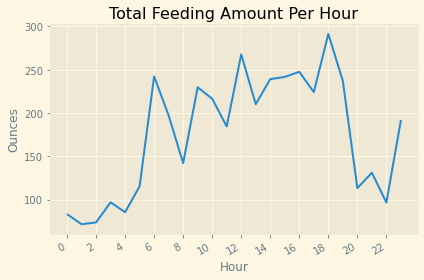

In [31]:
# Plot-Feeding Amount by Time
plt.yticks(np.arange(0, (max(df_feed_sum_hr_plot['Hour Feed Amount'])+20), 50))
plt.xticks(np.arange(0, 23, 2))
plt.plot(df_feed_sum_hr_plot['Hour(int)'], df_feed_sum_hr_plot['Hour Feed Amount'])
plt.title('Total Feeding Amount Per Hour')
plt.ylabel('Ounces')
plt.xlabel('Hour')
plt.gcf().autofmt_xdate()
plt.gcf().tight_layout()

##### *-Avg by Hr Setup*

In [32]:
# Group & Avg by Hour
df_feed_avg_hr = df_feed['Amount'].groupby(df_feed['Hour(int)']).mean().reset_index(name ='Hour Feed Avg')

df_feed_avg_hr.sort_values(by='Hour Feed Avg', ascending=False).head(10)

,Hour(int),Hour Feed Avg
12,12,4.182812
7,7,4.108333
23,23,3.997917
16,16,3.993548
13,13,3.967925
18,18,3.937838
6,6,3.908065
15,15,3.837302
14,14,3.796825
17,17,3.736667


#### *-Avg by Hr*

Text(0.5, 0, 'Hour')

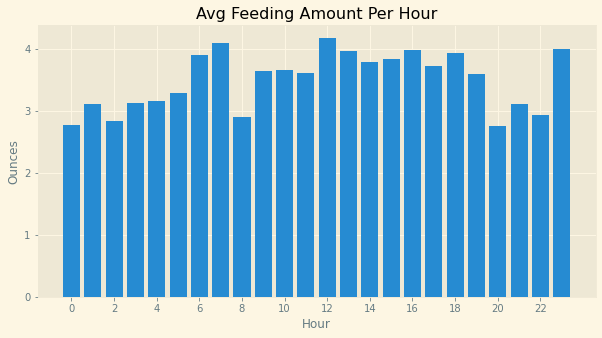

In [33]:
# Bar-Avg Feeding Amount Per Hr
figure(figsize=(10,5))
plt.yticks(np.arange(0, (max(df_feed_avg_hr['Hour Feed Avg'])+1), 1))
plt.xticks(np.arange(0, 23, 2))
plt.bar(df_feed_avg_hr['Hour(int)'], df_feed_avg_hr['Hour Feed Avg'])
plt.title('Avg Feeding Amount Per Hour')
plt.ylabel('Ounces')
plt.xlabel('Hour')

Top ten hours for average amount were:
1. 12 PM
2. 7 ***AM***
3. 11 PM
4. 4 PM
5. 1 PM
6. 6 PM
7. 6 ***AM***
8. 3 PM
9. 2 PM
10. 5 PM

12 PM, 4 PM, and 6 PM are in the top six of both total and average amount, but it may be better to analyze these times within separate months. The feeding amount and number of feedings changed each month, and aggregating by month will give us a better picture of favored times.

##### *-Sum by Hour/Month Setup*

In [34]:
# Group & Avg by Month, Hour
df_feed_sum_mth_hr = df_feed.groupby(['Month', 'Hour(int)', 'Hour(dt)']).agg({'Amount': ['sum']})
df_feed_sum_mth_hr = df_feed_sum_mth_hr.reset_index()
df_feed_sum_mth_hr.head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,sum
0,3,0,2022-01-01 00:00:00,24.5
1,3,1,2022-01-01 01:00:00,9.0
2,3,2,2022-01-01 02:00:00,14.7


#### *-Sum by Hour/Month*

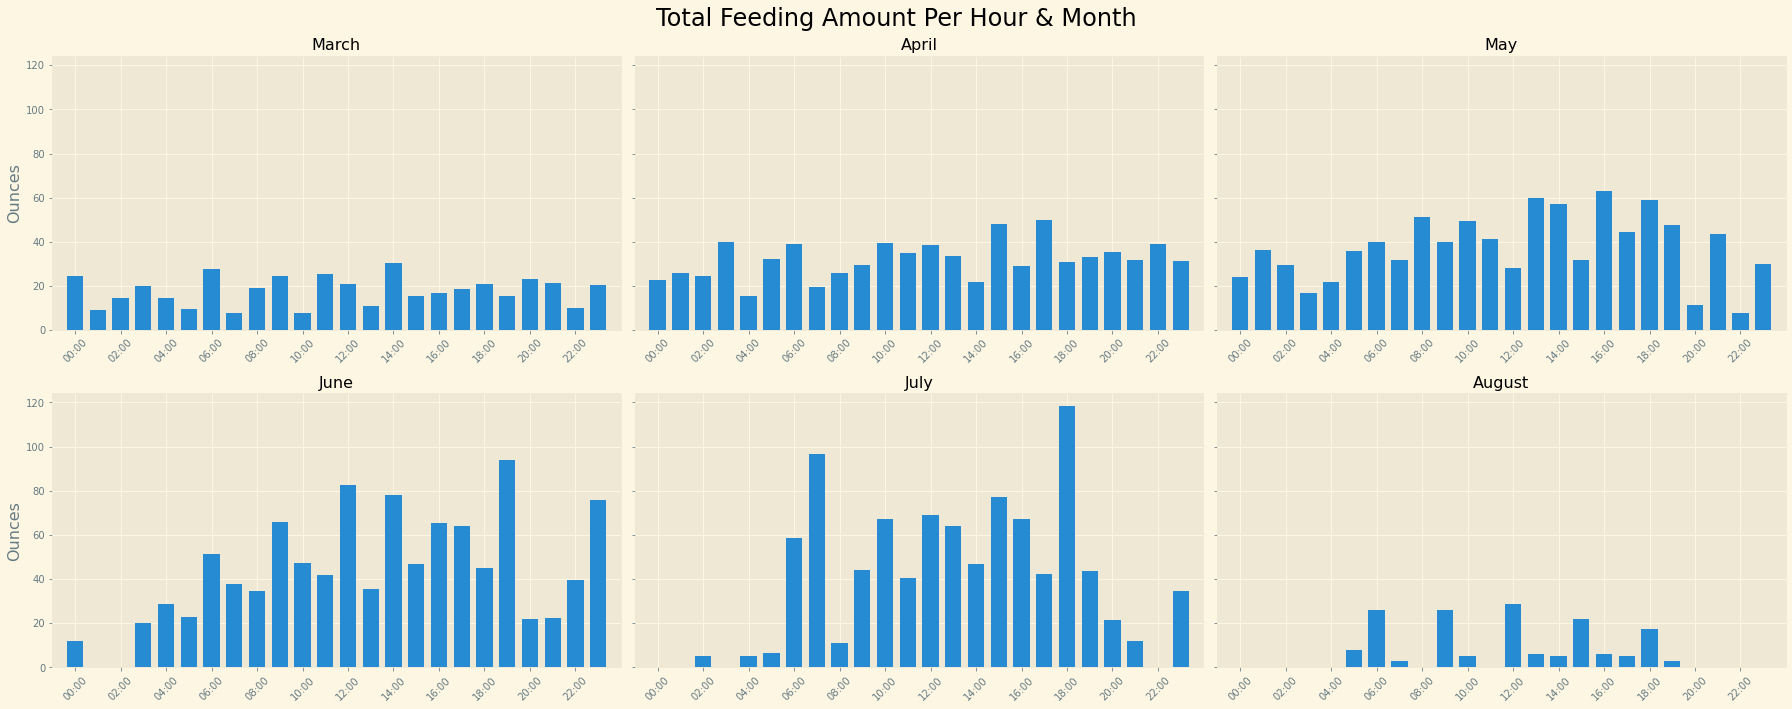

In [35]:
# Bar-Total Feeding Amount by Hour/Month
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(25,10), sharey=True)

list_of_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
n = 3
month_name = ['March', 'April', 'May', 'June', 'July', 'August']
i = 0

for ax in list_of_axes:
    df_feed_sum_mth_hr_m = df_feed_sum_mth_hr[df_feed_sum_mth_hr['Month'] == n]
    x = df_feed_sum_mth_hr_m['Hour(dt)']
    y = df_feed_sum_mth_hr_m['Amount']['sum']
    ax.bar(x, y, width=0.03, align='center')
    ax.title.set_text(month_name[i])
    n = n+1
    i = i+1

for ax in list_of_axes:
    hours = mdates.HourLocator(interval=2)
    hh_mm = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hh_mm)
    ax.set_xlim([datetime.datetime(2021,12,31,23,0), datetime.datetime(2022,1,1,23,59)])
    plt.setp(ax.get_xticklabels(), rotation=45)  

ax1.set_ylabel('Ounces', fontsize=16)
ax4.set_ylabel('Ounces', fontsize=16)
fig.suptitle('Total Feeding Amount Per Hour & Month', fontsize=24)

fig.tight_layout()

Total Feeding Amount - Top 3 Hours by Month:

- March: 2 PM, 6 ***AM***, 11 ***AM***
- April: 5 PM, 3 PM, 3 ***AM***
- May: 4 PM,  1 PM, 6 PM
- June: 7 PM, 12 PM, 2 PM
- July: 6 PM, 7 ***AM***, 3 PM
- August: 12 PM, 6 ***AM***, 9 ***AM***

##### *-Rank*

In [36]:
df_feed_sum_mth_hr[df_feed_sum_mth_hr['Month'] == 8].sort_values(by=('Amount','sum'),ascending=False).head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,sum
119,8,12,2022-01-01 12:00:00,28.75
115,8,6,2022-01-01 06:00:00,26.00
117,8,9,2022-01-01 09:00:00,25.80


##### *-Avg by Hour/Month Setup*

In [37]:
# Group & Avg by Month, Hour
df_feed_avg_mth_hr = df_feed.groupby(['Month', 'Hour(int)', 'Hour(dt)']).agg({'Amount': ['mean']})
df_feed_avg_mth_hr = df_feed_avg_mth_hr.reset_index()

df_feed_avg_mth_hr.head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,mean
0,3,0,2022-01-01 00:00:00,2.227273
1,3,1,2022-01-01 01:00:00,2.250000
2,3,2,2022-01-01 02:00:00,2.100000


#### *-Avg by Hour/Month*

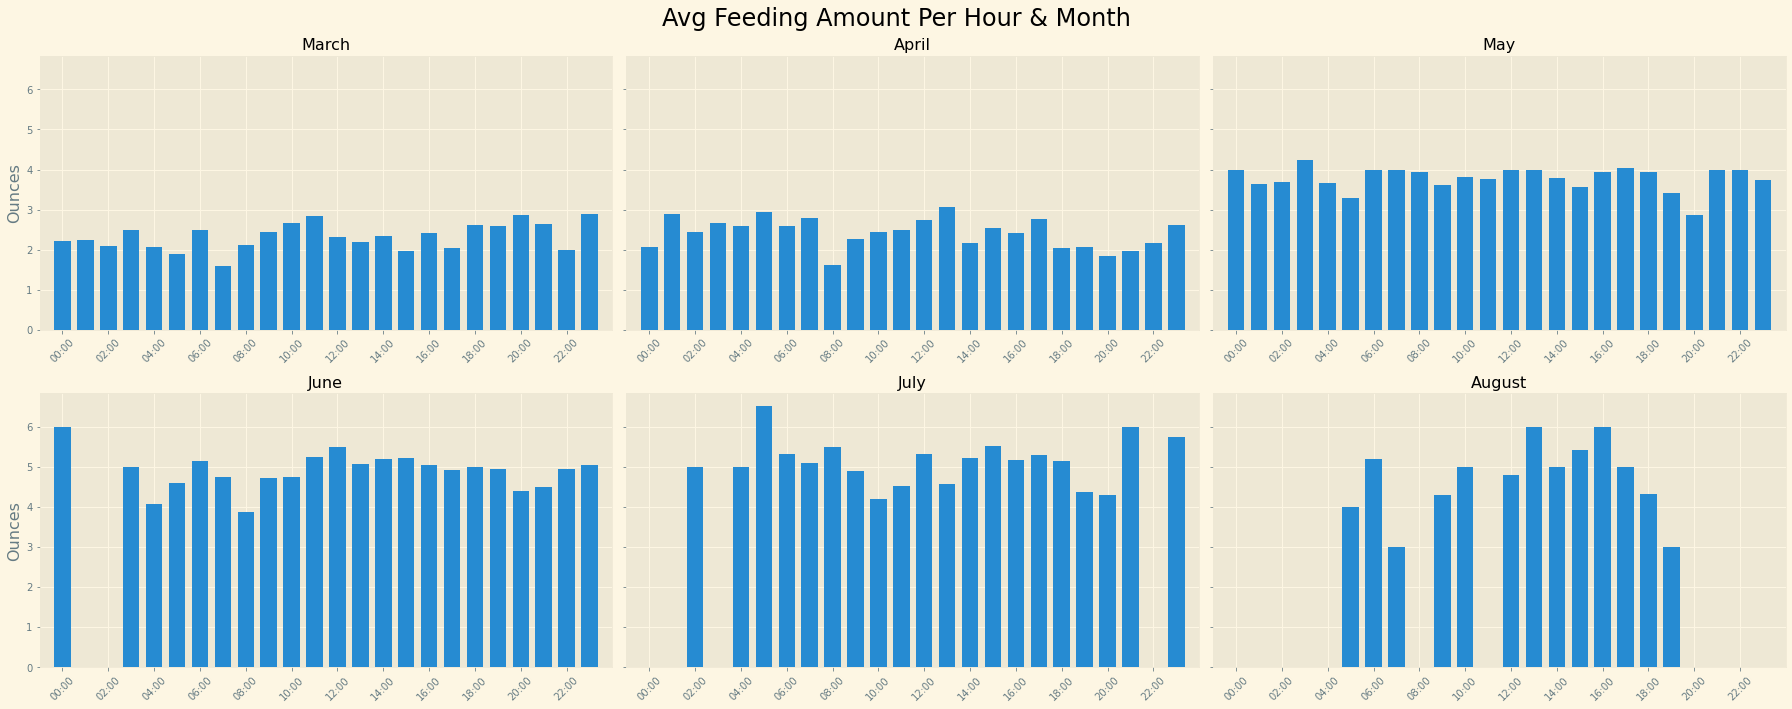

In [38]:
# Bar-Avg Feeding Amount by Hour/Month
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2, 3, figsize=(25,10), sharey=True)

list_of_axes = [ax1, ax2, ax3, ax4, ax5, ax6]
n = 3
month_name = ['March', 'April', 'May', 'June', 'July', 'August']
i = 0

for ax in list_of_axes:
    df_feed_avg_mth_hr_m = df_feed_avg_mth_hr[df_feed_avg_mth_hr['Month'] == n]
    x = df_feed_avg_mth_hr_m['Hour(dt)']
    y = df_feed_avg_mth_hr_m['Amount']['mean']
    ax.bar(x, y, width=0.03)
    ax.title.set_text(month_name[i])
    n = n+1
    i = i+1

for ax in list_of_axes:
    hours = mdates.HourLocator(interval=2)
    hh_mm = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(hh_mm)
    ax.set_xlim([datetime.datetime(2021,12,31,23,0), datetime.datetime(2022,1,1,23,59)])
    plt.setp(ax.get_xticklabels(), rotation=45)
    
ax1.set_ylabel('Ounces', fontsize=16)
ax4.set_ylabel('Ounces', fontsize=16)
fig.suptitle('Avg Feeding Amount Per Hour & Month', fontsize=24)

fig.tight_layout()

Total Feeding Amount - Top 3 Hours by Month:

- March: 11 PM, 8 PM, 11 ***AM***
- April: 1 PM, 5 ***AM***, 1 ***AM***
- May: 3 ***AM***,  5 PM, 12 ***AM***
- June: 12 ***AM***, 12 PM, 11 ***AM***
- July: 5 ***AM***, 9 PM, 11 PM
- August: 1 PM, 4 PM, 3 PM

For the first few months, the average feeding times seem to be spread out more or less evenly. However, as June rolls around, a couple late night feeding hours are completely dropped while some hours are slowly being established. At this point, we're slowly starting to get a rhythm and an idea of when she likes to feed. By August, we can see that most of the late night feedings have dropped. Sleep training had been completed and she started sleeping through the night! Hooray! ***A much more consistent feeding schedule has finally appeared by 5 months.***

##### *-Rank*

In [39]:
df_feed_avg_mth_hr[df_feed_avg_mth_hr['Month'] == 8].sort_values(by=('Amount','mean'),ascending=False).head(3)

,Month,Hour(int),Hour(dt),Amount
,,,,mean
120,8,13,2022-01-01 13:00:00,6.000
123,8,16,2022-01-01 16:00:00,6.000
122,8,15,2022-01-01 15:00:00,5.425


#### *Number of Feedings Per Day-Setup*

In [40]:
df_feed.head(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
18,Hidden Name,03/13/2022 0:56 AM,03/13/2022 0:56 AM,Feeding,2.0,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,00:56:00,0,2022-01-01 00:00:00
13,Hidden Name,03/13/2022 11:45 AM,03/13/2022 11:45 AM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,11:45:00,11,2022-01-01 11:00:00
24,Hidden Name,03/13/2022 14:45 PM,03/13/2022 14:45 PM,Feeding,2.5,NaN,0.0,Bottle,NaN,2022-03-13,3,6,Sunday,14:45:00,14,2022-01-01 14:00:00


In [41]:
df_feed.groupby(['Date','Hour(int)']).agg('count').tail(10)

Baby Name  Start Time  End Time  Activity  Amount  \
Date       Hour(int)                                                      
2022-08-05 6                  1           1         1         1       1   
           9                  2           2         2         2       2   
           12                 2           2         2         2       2   
           15                 1           1         1         1       1   
2022-08-06 5                  1           1         1         1       1   
           6                  1           1         1         1       1   
           9                  1           1         1         1       1   
           12                 1           1         1         1       1   
           15                 1           1         1         1       1   
           18                 1           1         1         1       1   

                      Percentile  Duration  Info  Notes  Month  DOW #  DOW  \
Date       Hour(int)                                                         
2022-08-05 6                   0         1     1      0      1      1    1   
           9                   0         2     2      0      2      2    2   
           12                  0         2     2      0      2      2    2   
           15                  0         1     1      0      1      1    1   
2022-08-06 5                   0         1     1      0      1      1    1   
           6                   0         1     1      0      1      1    1   
           9                   0         1     1      0      1      1    1   
           12                  0         1     1      0      1      1    1   
           15                  0         1     1      0      1      1    1   
           18                  0         1     1      0      1      1    1   

                      Time  Hour(dt)  
Date       Hour(int)                  
2022-08-05 6             1         1  
           9             2         2  
           12            2         2  
           15            1         1  
2022-08-06 5             1         1  
           6             1         1  
           9             1         1  
           12            1         1  
           15            1         1  
           18            1         1

In [42]:
df_num_feed = df_feed.groupby(['Date','Hour(int)']).agg('count')

In [43]:
df_test = df_num_feed.groupby(level=0).count()['Baby Name']
df_test.loc['2022-04-01':'2022-04-15']

Date
2022-04-01    12
2022-04-02    11
2022-04-03    14
2022-04-04    14
2022-04-05    11
2022-04-06    14
2022-04-07    10
2022-04-08    13
2022-04-09    13
2022-04-10    10
2022-04-11    14
2022-04-12     9
2022-04-13     9
2022-04-14    10
2022-04-15     9
Name: Baby Name, dtype: int64

In [44]:
df_num_feed.loc['2022-04-01':'2022-04-15'].head(13)

Baby Name  Start Time  End Time  Activity  Amount  \
Date       Hour(int)                                                      
2022-04-01 0                  1           1         1         1       1   
           2                  1           1         1         1       1   
           5                  1           1         1         1       1   
           8                  1           1         1         1       1   
           9                  1           1         1         1       1   
           12                 1           1         1         1       1   
           14                 1           1         1         1       1   
           15                 1           1         1         1       1   
           18                 1           1         1         1       1   
           20                 2           2         2         2       2   
           21                 2           2         2         2       2   
           22                 2           2         2         2       2   
2022-04-02 0                  1           1         1         1       1   

                      Percentile  Duration  Info  Notes  Month  DOW #  DOW  \
Date       Hour(int)                                                         
2022-04-01 0                   0         1     1      0      1      1    1   
           2                   0         1     1      0      1      1    1   
           5                   0         1     1      0      1      1    1   
           8                   0         1     1      0      1      1    1   
           9                   0         1     1      0      1      1    1   
           12                  0         1     1      0      1      1    1   
           14                  0         1     1      0      1      1    1   
           15                  0         1     1      0      1      1    1   
           18                  0         1     1      0      1      1    1   
           20                  0         2     2      0      2      2    2   
           21                  0         2     2      0      2      2    2   
           22                  0         2     2      0      2      2    2   
2022-04-02 0                   0         1     1      0      1      1    1   

                      Time  Hour(dt)  
Date       Hour(int)                  
2022-04-01 0             1         1  
           2             1         1  
           5             1         1  
           8             1         1  
           9             1         1  
           12            1         1  
           14            1         1  
           15            1         1  
           18            1         1  
           20            2         2  
           21            2         2  
           22            2         2  
2022-04-02 0             1         1

In [45]:
df_feed[(df_feed['Date']=='2022-04-01')]

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
307,Hidden Name,04/01/2022 0:10 AM,04/01/2022 0:20 AM,Feeding,0.0,NaN,10.0,Left,NaN,2022-04-01,4,4,Friday,00:10:00,0,2022-01-01 00:00:00
314,Hidden Name,04/01/2022 12:00 PM,04/01/2022 12:00 PM,Feeding,3.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,12:00:00,12,2022-01-01 12:00:00
315,Hidden Name,04/01/2022 14:44 PM,04/01/2022 14:44 PM,Feeding,3.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,14:44:00,14,2022-01-01 14:00:00
317,Hidden Name,04/01/2022 15:40 PM,04/01/2022 15:48 PM,Feeding,0.0,NaN,8.0,Left,NaN,2022-04-01,4,4,Friday,15:40:00,15,2022-01-01 15:00:00
319,Hidden Name,04/01/2022 18:45 PM,04/01/2022 18:45 PM,Feeding,3.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,18:45:00,18,2022-01-01 18:00:00
322,Hidden Name,04/01/2022 20:20 PM,04/01/2022 20:36 PM,Feeding,0.0,NaN,16.0,Both,NaN,2022-04-01,4,4,Friday,20:20:00,20,2022-01-01 20:00:00
320,Hidden Name,04/01/2022 20:30 PM,04/01/2022 20:30 PM,Feeding,1.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,20:30:00,20,2022-01-01 20:00:00
323,Hidden Name,04/01/2022 21:30 PM,04/01/2022 21:30 PM,Feeding,1.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,21:30:00,21,2022-01-01 21:00:00
324,Hidden Name,04/01/2022 21:45 PM,04/01/2022 21:45 PM,Feeding,1.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,21:45:00,21,2022-01-01 21:00:00
325,Hidden Name,04/01/2022 22:00 PM,04/01/2022 22:00 PM,Feeding,2.0,NaN,0.0,Bottle,NaN,2022-04-01,4,4,Friday,22:00:00,22,2022-01-01 22:00:00


#### *-Number of Feedings Per Day*

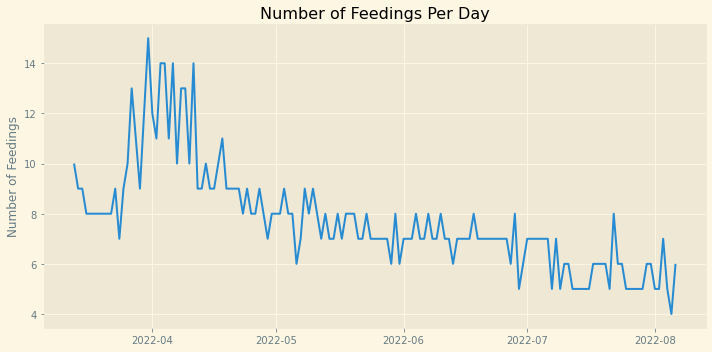

In [46]:
# Plot-Feeding Amount by Time
x = df_num_feed.groupby(level=0).count().index
y = df_num_feed.groupby(level=0).count()['Baby Name']

figure(figsize=(10,5))
plt.yticks(np.arange(0, (max(y)+2), 2))
plt.plot(x,y)
plt.title('Number of Feedings Per Day')
plt.ylabel('Number of Feedings')
plt.gcf().tight_layout()

Since we recorded bottle and breastfeedings separately, this will give us a larger number of feedings than reality. For example, we may have given the bottle initially, but if she was still hungry, she was given more through breastfeeding. Even though this should be a single feeding, it was recorded twice because the app cannot combine different types of feeding methods. Therefore, I made these into single feedings by unifying them to each hour.

Even with the adjustment, the data shows that there were a large number feedings per day in the first month or so. Newborns can only drink a few ounces at a time, hence more feedings per day, but this was also due to our inexperience. If she was crying, we were unsure if she was still hungry, sleepy, uncomfortable, or something else. This caused many moments where we mistook her cries as feeding cues and attempted to feed her, causing more feeding records. Eventually, we got the hang of it! As she grew, she could drink more per feeding and the number of feedings stabilized to something manageable and consistent.

#### Dirty Diapers Setup

In [47]:
# Filter Diapers, Dirty
df_diapers = df2[df2['Activity']=='Diaper']
df_drty_diapers = df_diapers[df_diapers['Amount'].str.contains('Dirty')]
df_drty_diapers.tail(3)

,Baby Name,Start Time,End Time,Activity,Amount,Percentile,Duration,Info,Notes,Date,Month,DOW #,DOW,Time,Hour(int),Hour(dt)
1852,Hidden Name,07/31/2022 14:23 PM,07/31/2022 14:23 PM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-07-31,7,6,Sunday,14:23:00,14,2022-01-01 14:00:00
1868,Hidden Name,08/03/2022 8:44 AM,08/03/2022 8:44 AM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-08-03,8,2,Wednesday,08:44:00,8,2022-01-01 08:00:00
1886,Hidden Name,08/05/2022 17:20 PM,08/05/2022 17:20 PM,Diaper,Dirty,NaN,NaN,NaN,NaN,2022-08-05,8,4,Friday,17:20:00,17,2022-01-01 17:00:00


## Dirty Diapers

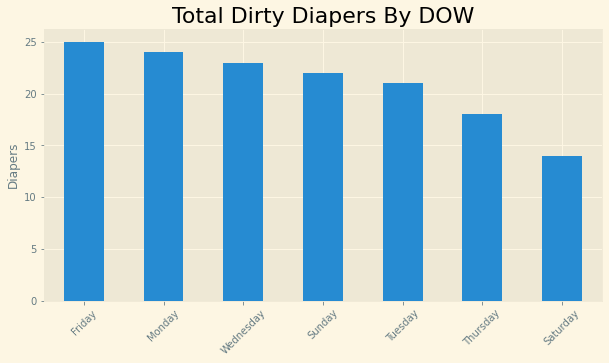

In [48]:
# Bar-Total Dirty Diapers by DOW
figure(figsize=(10,5))
ax = pd.value_counts(df_drty_diapers['DOW']).plot.bar()
ax.set_title('Total Dirty Diapers By DOW', fontsize=22)
ax.set_ylabel('Diapers')
ax.tick_params(axis='x', rotation=45)

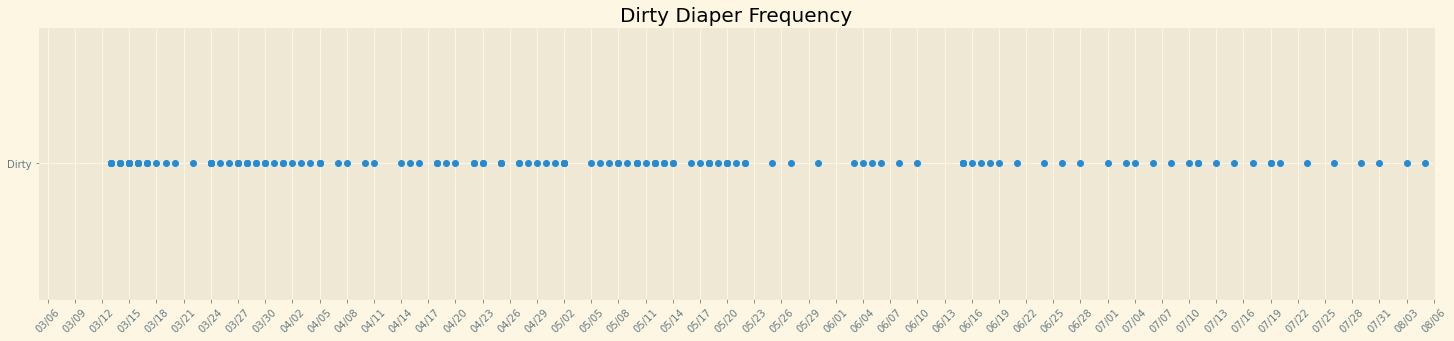

In [49]:
# Plot-Dirty Diaper Frequency
df_drty_diapers_plot = df_drty_diapers.copy()
df_drty_diapers_plot['Amount'] = df_drty_diapers['Amount'].replace('Wet + Dirty', 'Dirty')

x = df_drty_diapers_plot['Date']
y = df_drty_diapers_plot['Amount']

fig, ax_dd = plt.subplots(1,1, figsize=(25,5))

plt.xlim([datetime.date(2022, 3, 5), datetime.date(2022, 8, 6)])
plt.tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax_dd.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax_dd.set_title('Dirty Diaper Frequency', fontsize=20)
ax_dd = plt.scatter(x,y)

##### Dirty Diaper Totals by Month

In [50]:
df_drty_diapers_mth = df_drty_diapers_plot.groupby('Month')
df_drty_diapers_mth['Amount'].count()

Month
3    41
4    31
5    37
6    18
7    18
8     2
Name: Amount, dtype: int64

##### Estimate Dirty Diaper Frequency by Month

In [51]:
df_drty_diapers_mth['Amount'].count().div(31)

Month
3    1.322581
4    1.000000
5    1.193548
6    0.580645
7    0.580645
8    0.064516
Name: Amount, dtype: float64

Our daughter's first dirty diaper came on March 13, more than a week after birth. It was certainly relieving to finally have that first dirty diaper, and it became consistent after that. However, it seems that as she got older, she had less frequent dirty diapers. She went from averaging at least one dirty diaper a day to only one dirty diaper about every other day. ***It does seem that around the time we started to feed her more (May), she slowly started to have less dirty diapers.*** Could this be due to other factors such as feeding more formula rather than breastmilk? Further analysis is required, but that's for another day!

## Conclusion

Overall, I am so glad that my daughter is growing healthy and strong. From this analysis, it looks like we are on the right track raising our child. Thanks for coming along on this journey with me!